In [1]:
import sompy
from sompy.visualization.hitmap import HitMapView
from sompy.visualization.umatrix import UMatrixView
from sompy.visualization.bmuhits import BmuHitsView

from sklearn.cluster import KMeans

import pandas as pd
import numpy as np

import os
import warnings

from scipy.io import wavfile

from hmmlearn import hmm      

from python_speech_features import mfcc

from sklearn.externals import joblib

import hmm_model_feature_extraction

import random

import matplotlib.pyplot as plt
mixed_dir = "../../../mixed"

CACHEDIR=/root/.cache/matplotlib
Using fontManager instance from /root/.cache/matplotlib/fontlist-v310.json
Loaded backend module://ipykernel.pylab.backend_inline version unknown.
Loaded backend module://ipykernel.pylab.backend_inline version unknown.
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
"""

TOPOGRAPHIC ERROR: One of the primary goals of the SOM algorithm is to preserve the topological
features of the input space in the low dimensional output space. Topographic error
(TE) is a measure of how well the structure of the input space is modeled by the
map. Specifically, it evaluates the local discontinuities in the mapping [3]. TE is
calculated by finding the best-matching and second-best-matching neuron in the
map for each input and then evaluating the positions. If the nodes are next to
each other, then we say topology has been preserved for this input. If not, then
this is counted as an error. The total number of errors divided by the total number
of data points gives the topographic error of the map. 

QUANTIZATION ERROR: Based on the signaling processing concept of the same name, quantization
error (QE) is a measure of the average distance between the data points and the
map nodes to which they are mapped, with smaller values indicating a better fit.
Kohonen suggested QE as the basic quality measure for evaluating self-organizing
maps.
"""

'\n\nTOPOGRAPHIC ERROR: One of the primary goals of the SOM algorithm is to preserve the topological\nfeatures of the input space in the low dimensional output space. Topographic error\n(TE) is a measure of how well the structure of the input space is modeled by the\nmap. Specifically, it evaluates the local discontinuities in the mapping [3]. TE is\ncalculated by finding the best-matching and second-best-matching neuron in the\nmap for each input and then evaluating the positions. If the nodes are next to\neach other, then we say topology has been preserved for this input. If not, then\nthis is counted as an error. The total number of errors divided by the total number\nof data points gives the topographic error of the map. \n\nQUANTIZATION ERROR: Based on the signaling processing concept of the same name, quantization\nerror (QE) is a measure of the average distance between the data points and the\nmap nodes to which they are mapped, with smaller values indicating a better fit.\nKoho

In [333]:
# initialize feature extraction

fe = feature_extraction.feature_extraction()

# load in mixed_metadata

metadata = pd.read_csv(mixed_dir + "/mixed_metadata.csv")

# labels we're dealing with

metadata['class'].value_counts()

drilling            3000
jackhammer          3000
children_playing    3000
engine_idling       3000
air_conditioner     3000
street_music        3000
dog_bark            3000
siren               2787
car_horn            1287
gun_shot            1122
Name: class, dtype: int64

# gun_shot

In [176]:
# create an empty array for appending features
train = metadata[metadata['class'] == "gun_shot"]['slice_file_name'].tolist()

X = np.array([])
    
for j in range(len(train)):
        
    loaded = fe.read(train[j])
    mfcc_features = fe.return_mfcc(loaded)

    if len(X) == 0:
                
        X = mfcc_features
            
    else:
                
        X = np.append(X, mfcc_features, axis=0)

frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT 

frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT 

frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT 

frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT 

frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT 

frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT 

frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT 

frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT 

frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT 

frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT 

frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT 

frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT 

frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT 

frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT 

In [281]:
# confirm shape is tractable for SOM: 100 - 200K

X.shape

(183860, 13)

In [282]:
# build som instance
som = sompy.SOMFactory().build(X, normalization = 'var', initialization='pca') 
# let sompy choose the mapsize
mapsize = som.calculate_map_size('rect')
# rebuild with map size
som = sompy.SOMFactory().build(X, mapsize = mapsize, normalization = 'var', initialization='pca') 
# train
som.train(n_job=-1, verbose='info', train_rough_len=10, train_finetune_len=10)

 Training...
 pca_linear_initialization took: 0.255000 seconds
 Rough training...
 radius_ini: 7.000000 , radius_final: 1.750000, trainlen: 10

 epoch: 1 ---> elapsed time:  3.138000, quantization error: 2.541718

 epoch: 2 ---> elapsed time:  3.134000, quantization error: 2.437505

 epoch: 3 ---> elapsed time:  3.783000, quantization error: 2.286670

 epoch: 4 ---> elapsed time:  10.647000, quantization error: 2.161611

 epoch: 5 ---> elapsed time:  6.880000, quantization error: 2.090236

 epoch: 6 ---> elapsed time:  3.318000, quantization error: 2.034148

 epoch: 7 ---> elapsed time:  3.818000, quantization error: 1.979853

 epoch: 8 ---> elapsed time:  3.706000, quantization error: 1.922422

 epoch: 9 ---> elapsed time:  14.887000, quantization error: 1.859918

 epoch: 10 ---> elapsed time:  3.506000, quantization error: 1.790870

 Finetune training...
 radius_ini: 1.750000 , radius_final: 1.000000, trainlen: 10

 epoch: 1 ---> elapsed time:  3.443000, quantization error: 1.713920


In [283]:
# check topographical error: ideally less than .20

som.calculate_topographic_error()

0.1515446535407375

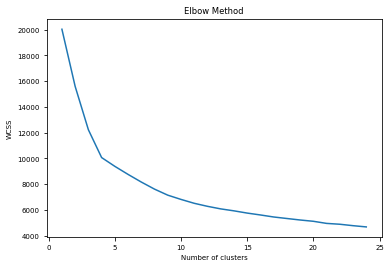

In [285]:
# create elbow plot applying kmeans cluster to the node weight vectors

codebook = som.codebook.matrix

wcss = []
for i in range(1, 25):
    kmeans = KMeans(n_clusters=i, init='k-means++', 
                    max_iter=300, n_init=10, random_state=0)
    kmeans.fit(codebook)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 25), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

/Users/chrisolen/anaconda3/lib/python3.7/site-packages/sompy/visualization/hitmap.py:37: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = self._fig.add_subplot(111)


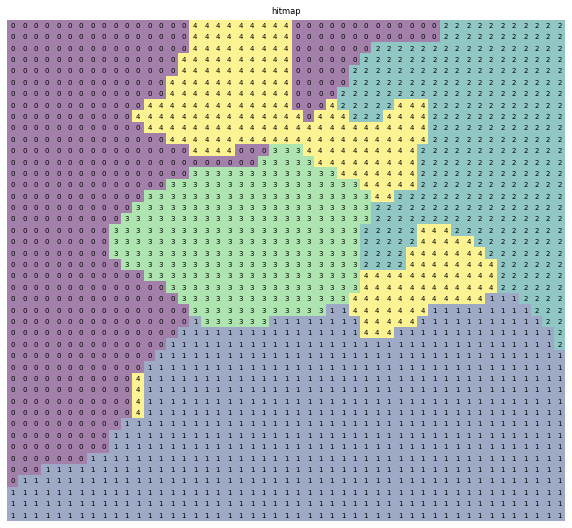

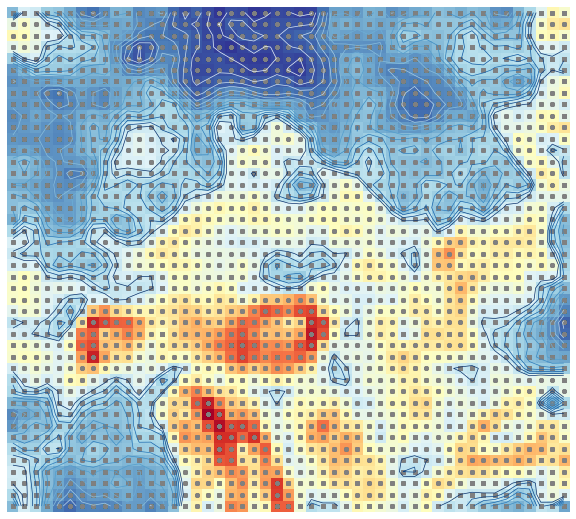

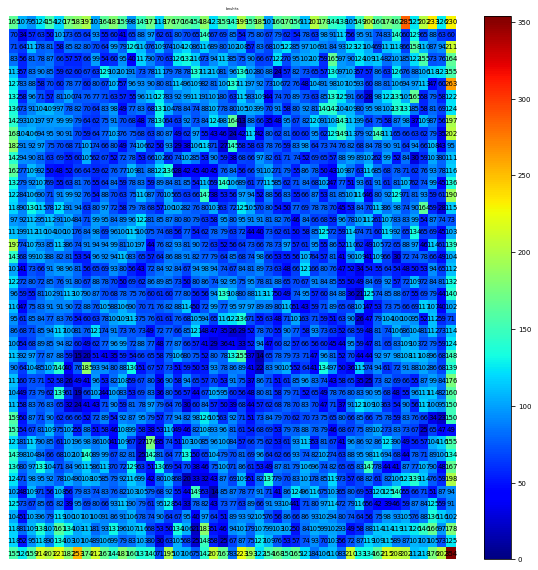

In [289]:
# plot hitmap, umatrix, and bmumap

"""
The ‘hills’ in the U-matrix represent large distances between neighbors and vice versa for valleys.

"""

som.cluster(5)

h = HitMapView(10, 10, 'hitmap')
u = UMatrixView(10, 10, "umatrix", text_size=7, labels=True, )
b = BmuHitsView(10, 10, "bmuhits", text_size=7)


x = h.show(som)
y = u.show(som)
z = b.show(som)



### Recommendation: 

Worth exploring 6-7 hidden states. 

# air_conditioner

In [290]:
# create an empty array for appending features
train = metadata[metadata['class'] == "air_conditioner"]['slice_file_name'].tolist()
# randomly select fraction of sample
train = random.sample(train, int(len(train) * 1/7))
X = np.array([])
    
for j in range(len(train)):
        
    loaded = fe.read(train[j])
    mfcc_features = fe.return_mfcc(loaded)

    if len(X) == 0:
                
        X = mfcc_features
            
    else:
                
        X = np.append(X, mfcc_features, axis=0)

# confirm shape is tractable for SOM: 100 - 200K

X.shape        

frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT 

frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT 

frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT 

frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT 

frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT 

frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT 

In [293]:
# build som instance
som = sompy.SOMFactory().build(X, normalization = 'var', initialization='pca') 
# let sompy choose the mapsize
mapsize = som.calculate_map_size('rect')
# rebuild with map size
som = sompy.SOMFactory().build(X, mapsize = mapsize, normalization = 'var', initialization='pca') 
# train
som.train(n_job=-1, verbose='info', train_rough_len=10, train_finetune_len=10)
# check topographical error: ideally less than .20
som.calculate_topographic_error()

 Training...
 pca_linear_initialization took: 0.242000 seconds
 Rough training...
 radius_ini: 7.000000 , radius_final: 1.750000, trainlen: 10

 epoch: 1 ---> elapsed time:  2.662000, quantization error: 2.565801

 epoch: 2 ---> elapsed time:  2.928000, quantization error: 2.533010

 epoch: 3 ---> elapsed time:  5.541000, quantization error: 2.438239

 epoch: 4 ---> elapsed time:  4.282000, quantization error: 2.319151

 epoch: 5 ---> elapsed time:  5.760000, quantization error: 2.221349

 epoch: 6 ---> elapsed time:  2.778000, quantization error: 2.143141

 epoch: 7 ---> elapsed time:  2.558000, quantization error: 2.069561

 epoch: 8 ---> elapsed time:  6.265000, quantization error: 1.993282

 epoch: 9 ---> elapsed time:  4.369000, quantization error: 1.910400

 epoch: 10 ---> elapsed time:  5.458000, quantization error: 1.814880

 Finetune training...
 radius_ini: 1.750000 , radius_final: 1.000000, trainlen: 10

 epoch: 1 ---> elapsed time:  2.819000, quantization error: 1.706956

 

0.14259948937764974

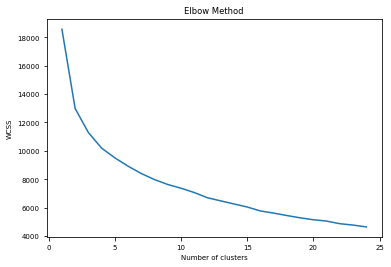

In [294]:
# create elbow plot applying kmeans cluster to the node weight vectors

codebook = som.codebook.matrix

wcss = []
for i in range(1, 25):
    kmeans = KMeans(n_clusters=i, init='k-means++', 
                    max_iter=300, n_init=10, random_state=0)
    kmeans.fit(codebook)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 25), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

/Users/chrisolen/anaconda3/lib/python3.7/site-packages/sompy/visualization/hitmap.py:37: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = self._fig.add_subplot(111)


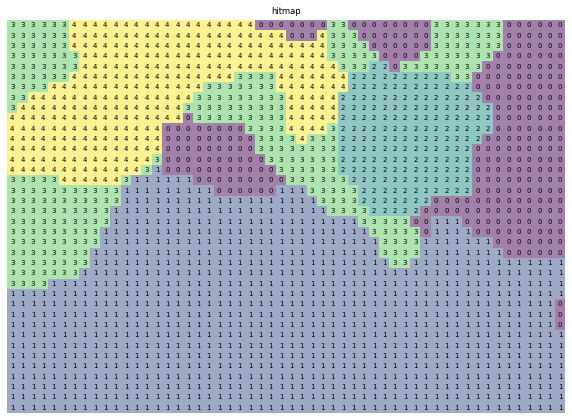

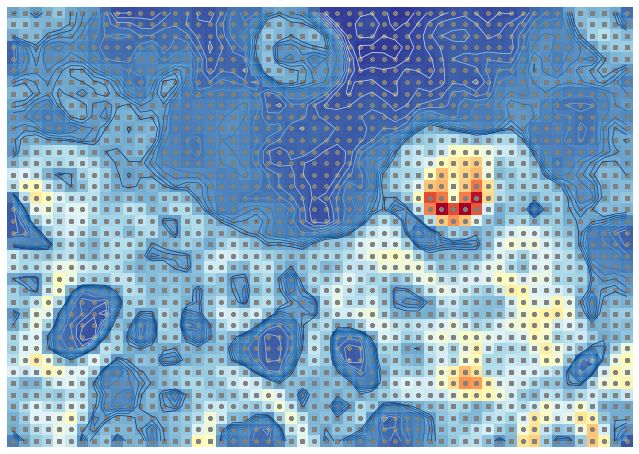

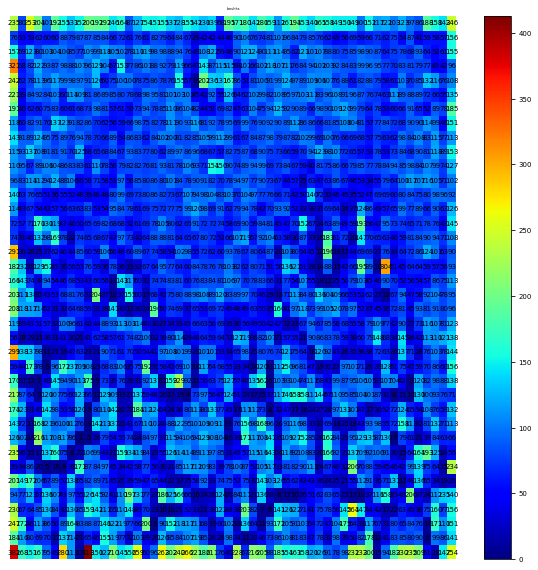

In [295]:
# plot hitmap, umatrix, and bmumap

"""
The ‘hills’ in the U-matrix represent large distances between neighbors and vice versa for valleys.

"""

som.cluster(5)

h = HitMapView(10, 10, 'hitmap')
u = UMatrixView(10, 10, "umatrix", text_size=7, labels=True, )
b = BmuHitsView(10, 10, "bmuhits", text_size=7)


x = h.show(som)
y = u.show(som)
z = b.show(som)



### Recommendation: 

Try 12-15

# siren

In [303]:
# create an empty array for appending features
train = metadata[metadata['class'] == "siren"]['slice_file_name'].tolist()
# randomly select fraction of sample
train = random.sample(train, int(len(train) * 1/7))
X = np.array([])
    
for j in range(len(train)):
        
    loaded = fe.read(train[j])
    mfcc_features = fe.return_mfcc(loaded)

    if len(X) == 0:
                
        X = mfcc_features
            
    else:
                
        X = np.append(X, mfcc_features, axis=0)

# confirm shape is tractable for SOM: 100 - 200K

X.shape        

frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT 

frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT 

frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT 

frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT 

frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT 

(155174, 13)

In [304]:
# build som instance
som = sompy.SOMFactory().build(X, normalization = 'var', initialization='pca') 
# let sompy choose the mapsize
mapsize = som.calculate_map_size('rect')
# rebuild with map size
som = sompy.SOMFactory().build(X, mapsize = mapsize, normalization = 'var', initialization='pca') 
# train
som.train(n_job=-1, verbose='info', train_rough_len=10, train_finetune_len=10)
# check topographical error: ideally less than .20
som.calculate_topographic_error()

 Training...
 pca_linear_initialization took: 0.219000 seconds
 Rough training...
 radius_ini: 7.000000 , radius_final: 1.750000, trainlen: 10

 epoch: 1 ---> elapsed time:  2.075000, quantization error: 2.570105

 epoch: 2 ---> elapsed time:  2.180000, quantization error: 2.546480

 epoch: 3 ---> elapsed time:  2.444000, quantization error: 2.465694

 epoch: 4 ---> elapsed time:  2.069000, quantization error: 2.375679

 epoch: 5 ---> elapsed time:  2.242000, quantization error: 2.311370

 epoch: 6 ---> elapsed time:  2.254000, quantization error: 2.252813

 epoch: 7 ---> elapsed time:  2.287000, quantization error: 2.196221

 epoch: 8 ---> elapsed time:  2.333000, quantization error: 2.138446

 epoch: 9 ---> elapsed time:  2.332000, quantization error: 2.075805

 epoch: 10 ---> elapsed time:  2.297000, quantization error: 2.003631

 Finetune training...
 radius_ini: 1.750000 , radius_final: 1.000000, trainlen: 10

 epoch: 1 ---> elapsed time:  2.355000, quantization error: 1.914658

 

0.1637774369417557

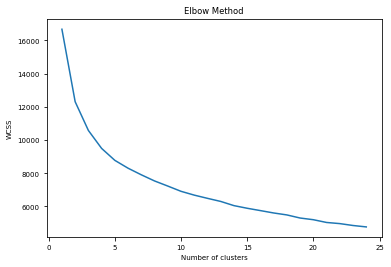

In [305]:
# create elbow plot applying kmeans cluster to the node weight vectors

codebook = som.codebook.matrix

wcss = []
for i in range(1, 25):
    kmeans = KMeans(n_clusters=i, init='k-means++', 
                    max_iter=300, n_init=10, random_state=0)
    kmeans.fit(codebook)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 25), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

/Users/chrisolen/anaconda3/lib/python3.7/site-packages/sompy/visualization/hitmap.py:37: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = self._fig.add_subplot(111)


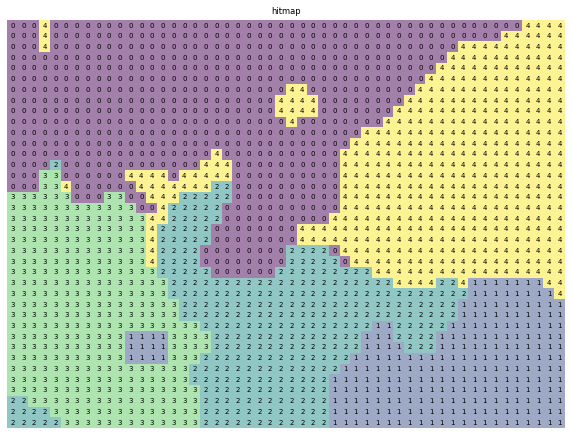

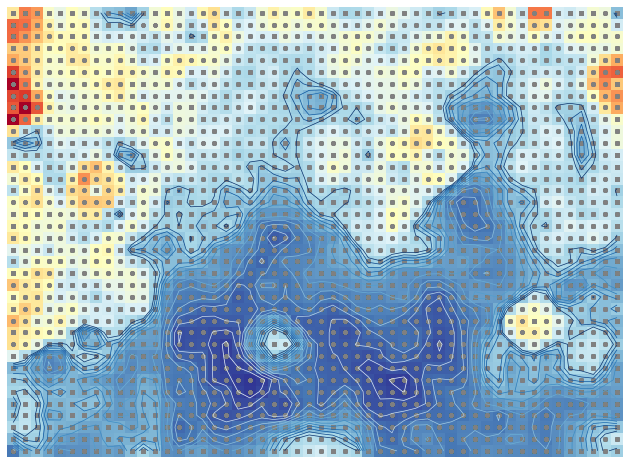

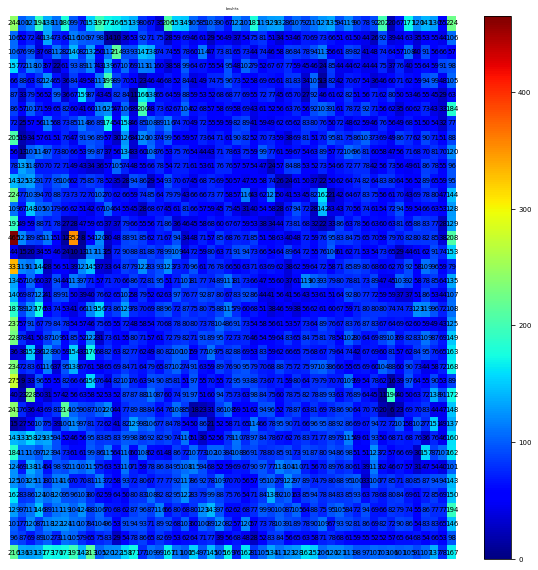

In [306]:
# plot hitmap, umatrix, and bmumap

"""
The ‘hills’ in the U-matrix represent large distances between neighbors and vice versa for valleys.

"""

som.cluster(5)

h = HitMapView(10, 10, 'hitmap')
u = UMatrixView(10, 10, "umatrix", text_size=7, labels=True, )
b = BmuHitsView(10, 10, "bmuhits", text_size=7)


x = h.show(som)
y = u.show(som)
z = b.show(som)



### Recommendation:

Try 6-7

# drilling

In [334]:
# create an empty array for appending features
train = metadata[metadata['class'] == "drilling"]['slice_file_name'].tolist()
# randomly select fraction of sample
train = random.sample(train, int(len(train) * 1/7))
X = np.array([])
    
for j in range(len(train)):
        
    loaded = fe.read(train[j])
    mfcc_features = fe.return_mfcc(loaded)

    if len(X) == 0:
                
        X = mfcc_features
            
    else:
                
        X = np.append(X, mfcc_features, axis=0)

# confirm shape is tractable for SOM: 100 - 200K

X.shape        

frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT 

frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT 

frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT 

frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT 

frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT 

frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT 

(150700, 13)

In [335]:
# build som instance
som = sompy.SOMFactory().build(X, normalization = 'var', initialization='pca') 
# let sompy choose the mapsize
mapsize = som.calculate_map_size('rect')
# rebuild with map size
som = sompy.SOMFactory().build(X, mapsize = mapsize, normalization = 'var', initialization='pca') 
# train
som.train(n_job=-1, verbose='info', train_rough_len=10, train_finetune_len=10)
# check topographical error: ideally less than .20
som.calculate_topographic_error()

 Training...
 pca_linear_initialization took: 0.240000 seconds
 Rough training...
 radius_ini: 6.000000 , radius_final: 1.500000, trainlen: 10

 epoch: 1 ---> elapsed time:  2.146000, quantization error: 2.823583

 epoch: 2 ---> elapsed time:  2.159000, quantization error: 2.714720

 epoch: 3 ---> elapsed time:  2.132000, quantization error: 2.571168

 epoch: 4 ---> elapsed time:  3.311000, quantization error: 2.463172

 epoch: 5 ---> elapsed time:  2.264000, quantization error: 2.376783

 epoch: 6 ---> elapsed time:  2.243000, quantization error: 2.302749

 epoch: 7 ---> elapsed time:  2.538000, quantization error: 2.230736

 epoch: 8 ---> elapsed time:  2.015000, quantization error: 2.151804

 epoch: 9 ---> elapsed time:  2.256000, quantization error: 2.059745

 epoch: 10 ---> elapsed time:  2.075000, quantization error: 1.954516

 Finetune training...
 radius_ini: 1.500000 , radius_final: 1.000000, trainlen: 10

 epoch: 1 ---> elapsed time:  4.334000, quantization error: 1.834308

 

0.15559389515593894

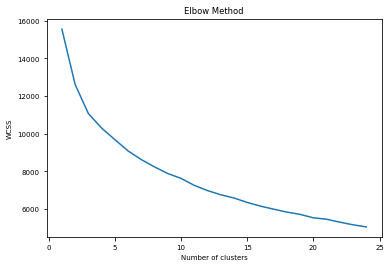

In [336]:
# create elbow plot applying kmeans cluster to the node weight vectors

codebook = som.codebook.matrix

wcss = []
for i in range(1, 25):
    kmeans = KMeans(n_clusters=i, init='k-means++', 
                    max_iter=300, n_init=10, random_state=0)
    kmeans.fit(codebook)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 25), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

/Users/chrisolen/anaconda3/lib/python3.7/site-packages/sompy/visualization/hitmap.py:37: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = self._fig.add_subplot(111)


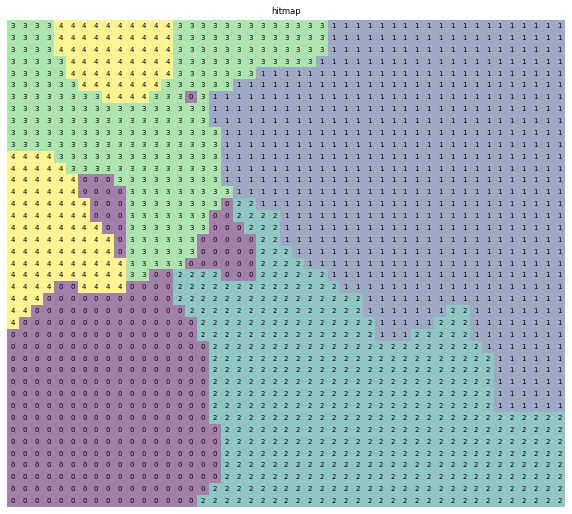

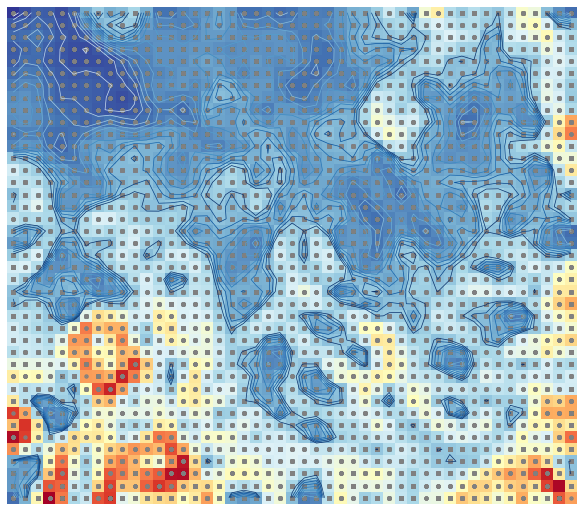

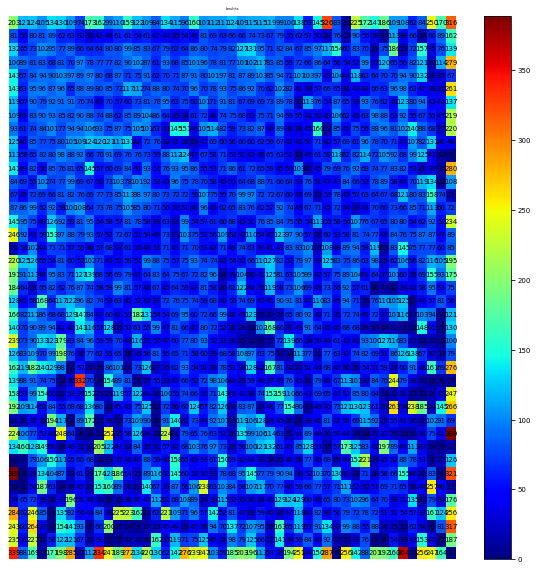

In [337]:
# plot hitmap, umatrix, and bmumap

"""
The ‘hills’ in the U-matrix represent large distances between neighbors and vice versa for valleys.

"""

som.cluster(5)

h = HitMapView(10, 10, 'hitmap')
u = UMatrixView(10, 10, "umatrix", text_size=7, labels=True, )
b = BmuHitsView(10, 10, "bmuhits", text_size=7)


x = h.show(som)
y = u.show(som)
z = b.show(som)



### Recommendation:

Try 9-10

# jackhammer

In [308]:
# create an empty array for appending features
train = metadata[metadata['class'] == "jackhammer"]['slice_file_name'].tolist()
# randomly select fraction of sample
train = random.sample(train, int(len(train) * 1/7))
X = np.array([])
    
for j in range(len(train)):
        
    loaded = fe.read(train[j])
    mfcc_features = fe.return_mfcc(loaded)

    if len(X) == 0:
                
        X = mfcc_features
            
    else:
                
        X = np.append(X, mfcc_features, axis=0)

# confirm shape is tractable for SOM: 100 - 200K

X.shape        

frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT 

frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT 

frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT 

frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT 

frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT 

frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT 

(153971, 13)

In [309]:
# build som instance
som = sompy.SOMFactory().build(X, normalization = 'var', initialization='pca') 
# let sompy choose the mapsize
mapsize = som.calculate_map_size('rect')
# rebuild with map size
som = sompy.SOMFactory().build(X, mapsize = mapsize, normalization = 'var', initialization='pca') 
# train
som.train(n_job=-1, verbose='info', train_rough_len=10, train_finetune_len=10)
# check topographical error: ideally less than .20
som.calculate_topographic_error()

 Training...
 pca_linear_initialization took: 0.230000 seconds
 Rough training...
 radius_ini: 7.000000 , radius_final: 1.750000, trainlen: 10

 epoch: 1 ---> elapsed time:  2.413000, quantization error: 2.689656

 epoch: 2 ---> elapsed time:  2.256000, quantization error: 2.614085

 epoch: 3 ---> elapsed time:  2.230000, quantization error: 2.476087

 epoch: 4 ---> elapsed time:  2.352000, quantization error: 2.383928

 epoch: 5 ---> elapsed time:  2.442000, quantization error: 2.323825

 epoch: 6 ---> elapsed time:  2.840000, quantization error: 2.269922

 epoch: 7 ---> elapsed time:  2.451000, quantization error: 2.211988

 epoch: 8 ---> elapsed time:  2.394000, quantization error: 2.148544

 epoch: 9 ---> elapsed time:  2.350000, quantization error: 2.080563

 epoch: 10 ---> elapsed time:  2.623000, quantization error: 2.006919

 Finetune training...
 radius_ini: 1.750000 , radius_final: 1.000000, trainlen: 10

 epoch: 1 ---> elapsed time:  2.356000, quantization error: 1.923425

 

0.1605756928252723

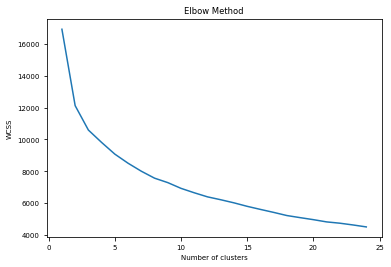

In [310]:
# create elbow plot applying kmeans cluster to the node weight vectors

codebook = som.codebook.matrix

wcss = []
for i in range(1, 25):
    kmeans = KMeans(n_clusters=i, init='k-means++', 
                    max_iter=300, n_init=10, random_state=0)
    kmeans.fit(codebook)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 25), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

/Users/chrisolen/anaconda3/lib/python3.7/site-packages/sompy/visualization/hitmap.py:37: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = self._fig.add_subplot(111)


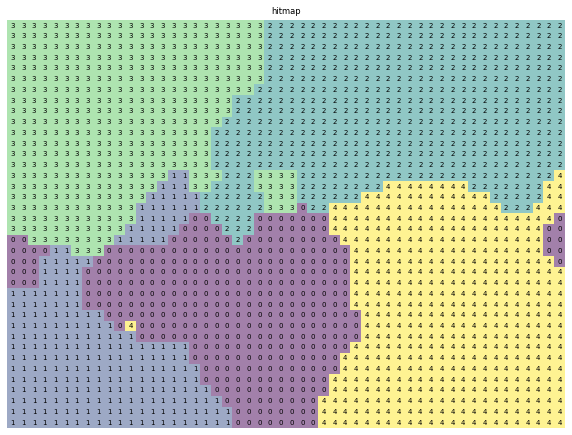

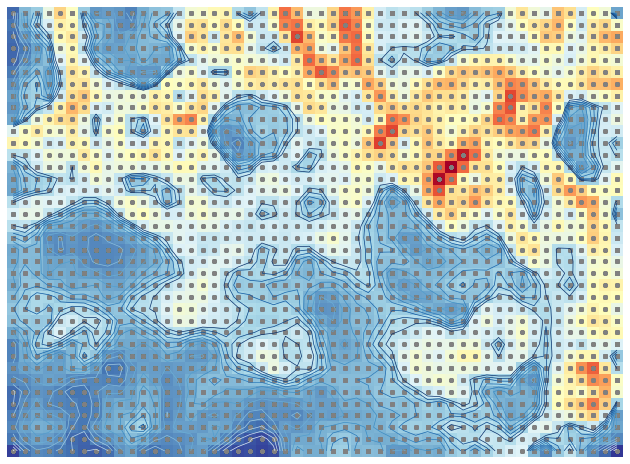

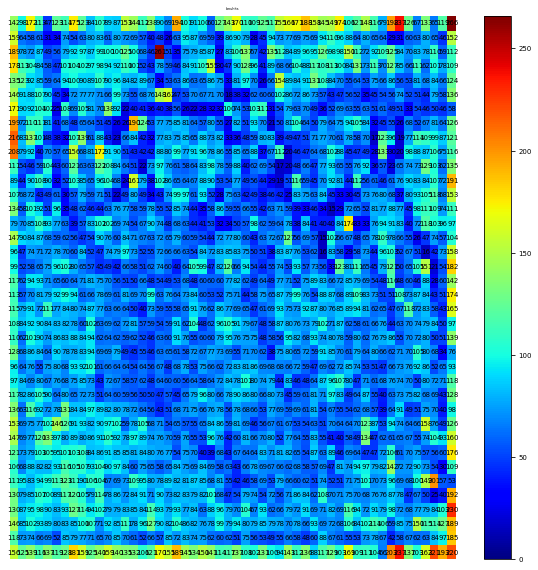

In [311]:
# plot hitmap, umatrix, and bmumap

"""
The ‘hills’ in the U-matrix represent large distances between neighbors and vice versa for valleys.

"""

som.cluster(5)

h = HitMapView(10, 10, 'hitmap')
u = UMatrixView(10, 10, "umatrix", text_size=7, labels=True, )
b = BmuHitsView(10, 10, "bmuhits", text_size=7)


x = h.show(som)
y = u.show(som)
z = b.show(som)



### Recommendation:

Try 9-10

# children_playing

In [312]:
# create an empty array for appending features
train = metadata[metadata['class'] == "children_playing"]['slice_file_name'].tolist()
# randomly select fraction of sample
train = random.sample(train, int(len(train) * 1/7))
X = np.array([])
    
for j in range(len(train)):
        
    loaded = fe.read(train[j])
    mfcc_features = fe.return_mfcc(loaded)

    if len(X) == 0:
                
        X = mfcc_features
            
    else:
                
        X = np.append(X, mfcc_features, axis=0)

# confirm shape is tractable for SOM: 100 - 200K

X.shape        

frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT 

frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT 

frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT 

frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT 

frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT 

frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT 

(169480, 13)

In [313]:
# build som instance
som = sompy.SOMFactory().build(X, normalization = 'var', initialization='pca') 
# let sompy choose the mapsize
mapsize = som.calculate_map_size('rect')
# rebuild with map size
som = sompy.SOMFactory().build(X, mapsize = mapsize, normalization = 'var', initialization='pca') 
# train
som.train(n_job=-1, verbose='info', train_rough_len=10, train_finetune_len=10)
# check topographical error: ideally less than .20
som.calculate_topographic_error()

 Training...
 pca_linear_initialization took: 0.231000 seconds
 Rough training...
 radius_ini: 7.000000 , radius_final: 1.750000, trainlen: 10

 epoch: 1 ---> elapsed time:  3.869000, quantization error: 2.608555

 epoch: 2 ---> elapsed time:  3.966000, quantization error: 2.567651

 epoch: 3 ---> elapsed time:  3.572000, quantization error: 2.486485

 epoch: 4 ---> elapsed time:  3.170000, quantization error: 2.399098

 epoch: 5 ---> elapsed time:  3.822000, quantization error: 2.326799

 epoch: 6 ---> elapsed time:  3.553000, quantization error: 2.272428

 epoch: 7 ---> elapsed time:  3.554000, quantization error: 2.220286

 epoch: 8 ---> elapsed time:  3.440000, quantization error: 2.163030

 epoch: 9 ---> elapsed time:  3.617000, quantization error: 2.099606

 epoch: 10 ---> elapsed time:  3.700000, quantization error: 2.032936

 Finetune training...
 radius_ini: 1.750000 , radius_final: 1.000000, trainlen: 10

 epoch: 1 ---> elapsed time:  3.661000, quantization error: 1.961545

 

0.16481590748170877

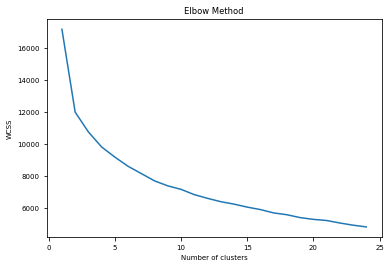

In [314]:
# create elbow plot applying kmeans cluster to the node weight vectors

codebook = som.codebook.matrix

wcss = []
for i in range(1, 25):
    kmeans = KMeans(n_clusters=i, init='k-means++', 
                    max_iter=300, n_init=10, random_state=0)
    kmeans.fit(codebook)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 25), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

/Users/chrisolen/anaconda3/lib/python3.7/site-packages/sompy/visualization/hitmap.py:37: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = self._fig.add_subplot(111)


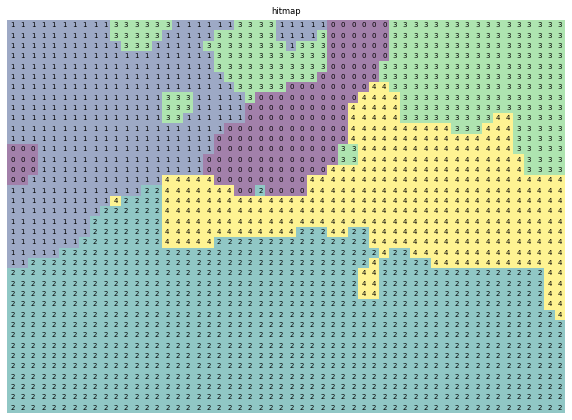

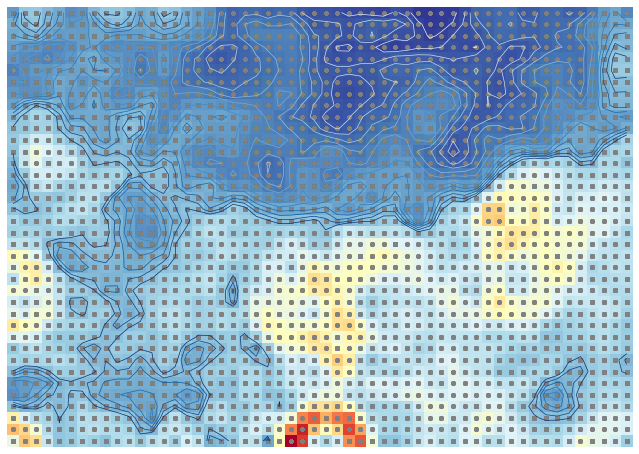

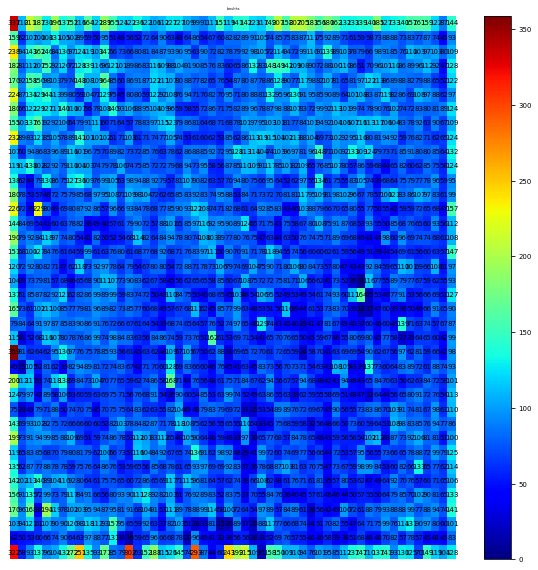

In [315]:
# plot hitmap, umatrix, and bmumap

"""
The ‘hills’ in the U-matrix represent large distances between neighbors and vice versa for valleys.

"""

som.cluster(5)

h = HitMapView(10, 10, 'hitmap')
u = UMatrixView(10, 10, "umatrix", text_size=7, labels=True, )
b = BmuHitsView(10, 10, "bmuhits", text_size=7)


x = h.show(som)
y = u.show(som)
z = b.show(som)



### Recommendation:

Try 9-10

# engine_idling

In [316]:
# create an empty array for appending features
train = metadata[metadata['class'] == "engine_idling"]['slice_file_name'].tolist()
# randomly select fraction of sample
train = random.sample(train, int(len(train) * 1/7))
X = np.array([])
    
for j in range(len(train)):
        
    loaded = fe.read(train[j])
    mfcc_features = fe.return_mfcc(loaded)

    if len(X) == 0:
                
        X = mfcc_features
            
    else:
                
        X = np.append(X, mfcc_features, axis=0)

# confirm shape is tractable for SOM: 100 - 200K

X.shape        

frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT 

frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT 

frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT 

frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT 

frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT 

frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT 

(167528, 13)

In [317]:
# build som instance
som = sompy.SOMFactory().build(X, normalization = 'var', initialization='pca') 
# let sompy choose the mapsize
mapsize = som.calculate_map_size('rect')
# rebuild with map size
som = sompy.SOMFactory().build(X, mapsize = mapsize, normalization = 'var', initialization='pca') 
# train
som.train(n_job=-1, verbose='info', train_rough_len=10, train_finetune_len=10)
# check topographical error: ideally less than .20
som.calculate_topographic_error()

 Training...
 pca_linear_initialization took: 0.221000 seconds
 Rough training...
 radius_ini: 7.000000 , radius_final: 1.750000, trainlen: 10

 epoch: 1 ---> elapsed time:  4.169000, quantization error: 2.518889

 epoch: 2 ---> elapsed time:  4.206000, quantization error: 2.417212

 epoch: 3 ---> elapsed time:  5.881000, quantization error: 2.332671

 epoch: 4 ---> elapsed time:  10.386000, quantization error: 2.265014

 epoch: 5 ---> elapsed time:  4.194000, quantization error: 2.185612

 epoch: 6 ---> elapsed time:  5.801000, quantization error: 2.110447

 epoch: 7 ---> elapsed time:  4.329000, quantization error: 2.044303

 epoch: 8 ---> elapsed time:  4.421000, quantization error: 1.978313

 epoch: 9 ---> elapsed time:  4.047000, quantization error: 1.906629

 epoch: 10 ---> elapsed time:  4.422000, quantization error: 1.826158

 Finetune training...
 radius_ini: 1.750000 , radius_final: 1.000000, trainlen: 10

 epoch: 1 ---> elapsed time:  4.117000, quantization error: 1.733066



0.1572811709087436

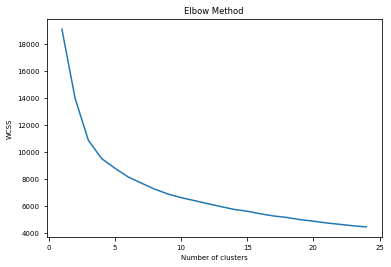

In [318]:
# create elbow plot applying kmeans cluster to the node weight vectors

codebook = som.codebook.matrix

wcss = []
for i in range(1, 25):
    kmeans = KMeans(n_clusters=i, init='k-means++', 
                    max_iter=300, n_init=10, random_state=0)
    kmeans.fit(codebook)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 25), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

/Users/chrisolen/anaconda3/lib/python3.7/site-packages/sompy/visualization/hitmap.py:37: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = self._fig.add_subplot(111)


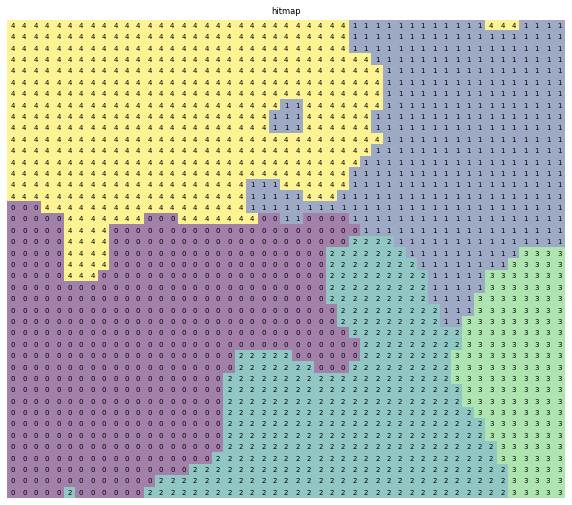

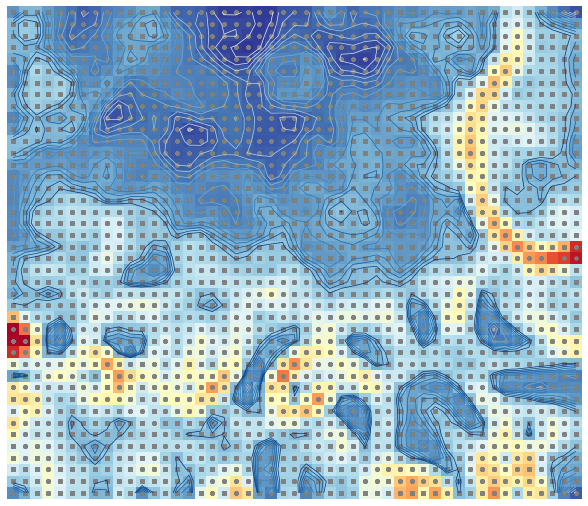

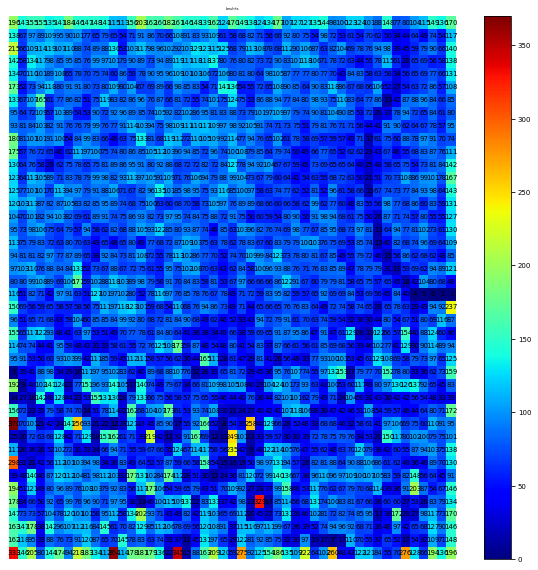

In [319]:
# plot hitmap, umatrix, and bmumap

"""
The ‘hills’ in the U-matrix represent large distances between neighbors and vice versa for valleys.

"""

som.cluster(5)

h = HitMapView(10, 10, 'hitmap')
u = UMatrixView(10, 10, "umatrix", text_size=7, labels=True, )
b = BmuHitsView(10, 10, "bmuhits", text_size=7)


x = h.show(som)
y = u.show(som)
z = b.show(som)



### Recommendation:

Try 10-12

# street_music

In [321]:
# create an empty array for appending features
train = metadata[metadata['class'] == "street_music"]['slice_file_name'].tolist()
# randomly select fraction of sample
train = random.sample(train, int(len(train) * 1/7))
X = np.array([])
    
for j in range(len(train)):
        
    loaded = fe.read(train[j])
    mfcc_features = fe.return_mfcc(loaded)

    if len(X) == 0:
                
        X = mfcc_features
            
    else:
                
        X = np.append(X, mfcc_features, axis=0)

# confirm shape is tractable for SOM: 100 - 200K

X.shape        

frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT 

frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT 

frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT 

frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT 

frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT 

frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT 

(170772, 13)

In [322]:
# build som instance
som = sompy.SOMFactory().build(X, normalization = 'var', initialization='pca') 
# let sompy choose the mapsize
mapsize = som.calculate_map_size('rect')
# rebuild with map size
som = sompy.SOMFactory().build(X, mapsize = mapsize, normalization = 'var', initialization='pca') 
# train
som.train(n_job=-1, verbose='info', train_rough_len=10, train_finetune_len=10)
# check topographical error: ideally less than .20
som.calculate_topographic_error()

 Training...
 pca_linear_initialization took: 0.228000 seconds
 Rough training...
 radius_ini: 7.000000 , radius_final: 1.750000, trainlen: 10

 epoch: 1 ---> elapsed time:  2.677000, quantization error: 2.606243

 epoch: 2 ---> elapsed time:  2.755000, quantization error: 2.588693

 epoch: 3 ---> elapsed time:  2.416000, quantization error: 2.532772

 epoch: 4 ---> elapsed time:  2.696000, quantization error: 2.447203

 epoch: 5 ---> elapsed time:  2.995000, quantization error: 2.365722

 epoch: 6 ---> elapsed time:  2.674000, quantization error: 2.306248

 epoch: 7 ---> elapsed time:  2.476000, quantization error: 2.249131

 epoch: 8 ---> elapsed time:  2.493000, quantization error: 2.186971

 epoch: 9 ---> elapsed time:  2.574000, quantization error: 2.120499

 epoch: 10 ---> elapsed time:  2.656000, quantization error: 2.049485

 Finetune training...
 radius_ini: 1.750000 , radius_final: 1.000000, trainlen: 10

 epoch: 1 ---> elapsed time:  3.439000, quantization error: 1.968791

 

0.1757196730143115

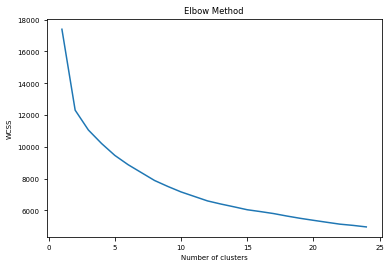

In [323]:
# create elbow plot applying kmeans cluster to the node weight vectors

codebook = som.codebook.matrix

wcss = []
for i in range(1, 25):
    kmeans = KMeans(n_clusters=i, init='k-means++', 
                    max_iter=300, n_init=10, random_state=0)
    kmeans.fit(codebook)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 25), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

/Users/chrisolen/anaconda3/lib/python3.7/site-packages/sompy/visualization/hitmap.py:37: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = self._fig.add_subplot(111)


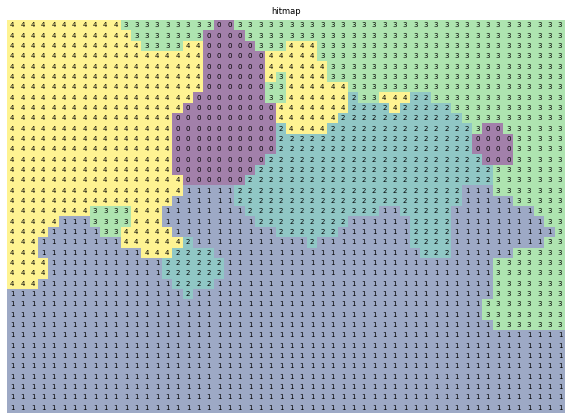

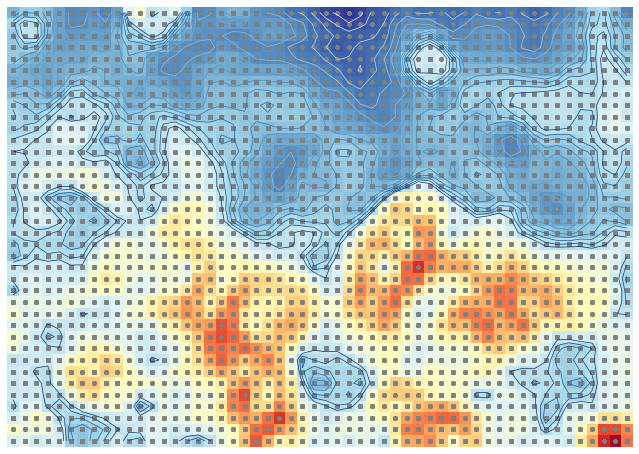

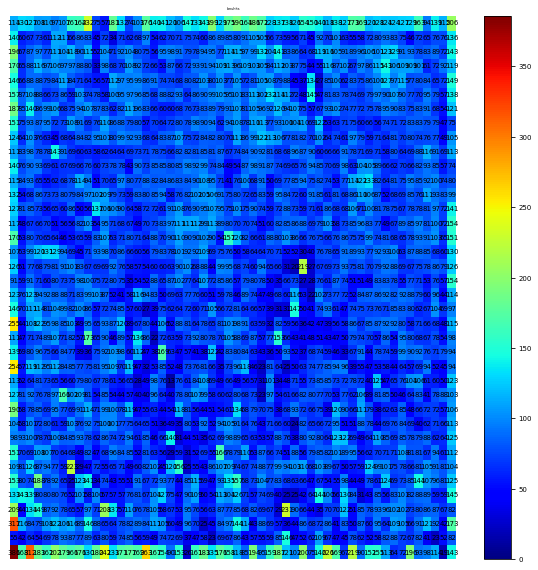

In [324]:
# plot hitmap, umatrix, and bmumap

"""
The ‘hills’ in the U-matrix represent large distances between neighbors and vice versa for valleys.

"""

som.cluster(5)

h = HitMapView(10, 10, 'hitmap')
u = UMatrixView(10, 10, "umatrix", text_size=7, labels=True, )
b = BmuHitsView(10, 10, "bmuhits", text_size=7)


x = h.show(som)
y = u.show(som)
z = b.show(som)



### Recommendation:

Try 7-8

# dog_bark

In [325]:
# create an empty array for appending features
train = metadata[metadata['class'] == "dog_bark"]['slice_file_name'].tolist()
# randomly select fraction of sample
train = random.sample(train, int(len(train) * 1/7))
X = np.array([])
    
for j in range(len(train)):
        
    loaded = fe.read(train[j])
    mfcc_features = fe.return_mfcc(loaded)

    if len(X) == 0:
                
        X = mfcc_features
            
    else:
                
        X = np.append(X, mfcc_features, axis=0)

# confirm shape is tractable for SOM: 100 - 200K

X.shape        

frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT 

frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT 

frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT 

frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT 

frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT 

frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT 

(135451, 13)

In [326]:
# build som instance
som = sompy.SOMFactory().build(X, normalization = 'var', initialization='pca') 
# let sompy choose the mapsize
mapsize = som.calculate_map_size('rect')
# rebuild with map size
som = sompy.SOMFactory().build(X, mapsize = mapsize, normalization = 'var', initialization='pca') 
# train
som.train(n_job=-1, verbose='info', train_rough_len=10, train_finetune_len=10)
# check topographical error: ideally less than .20
som.calculate_topographic_error()

 Training...
 pca_linear_initialization took: 0.184000 seconds
 Rough training...
 radius_ini: 7.000000 , radius_final: 1.750000, trainlen: 10

 epoch: 1 ---> elapsed time:  1.700000, quantization error: 2.520537

 epoch: 2 ---> elapsed time:  1.768000, quantization error: 2.472661

 epoch: 3 ---> elapsed time:  2.592000, quantization error: 2.391603

 epoch: 4 ---> elapsed time:  2.384000, quantization error: 2.321977

 epoch: 5 ---> elapsed time:  2.158000, quantization error: 2.265844

 epoch: 6 ---> elapsed time:  1.795000, quantization error: 2.218548

 epoch: 7 ---> elapsed time:  1.706000, quantization error: 2.169461

 epoch: 8 ---> elapsed time:  1.727000, quantization error: 2.114217

 epoch: 9 ---> elapsed time:  1.911000, quantization error: 2.052615

 epoch: 10 ---> elapsed time:  1.848000, quantization error: 1.980456

 Finetune training...
 radius_ini: 1.750000 , radius_final: 1.000000, trainlen: 10

 epoch: 1 ---> elapsed time:  1.655000, quantization error: 1.893164

 

0.1498475463451728

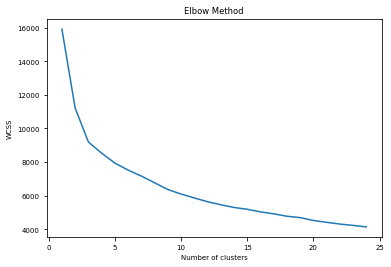

In [327]:
# create elbow plot applying kmeans cluster to the node weight vectors

codebook = som.codebook.matrix

wcss = []
for i in range(1, 25):
    kmeans = KMeans(n_clusters=i, init='k-means++', 
                    max_iter=300, n_init=10, random_state=0)
    kmeans.fit(codebook)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 25), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

/Users/chrisolen/anaconda3/lib/python3.7/site-packages/sompy/visualization/hitmap.py:37: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = self._fig.add_subplot(111)


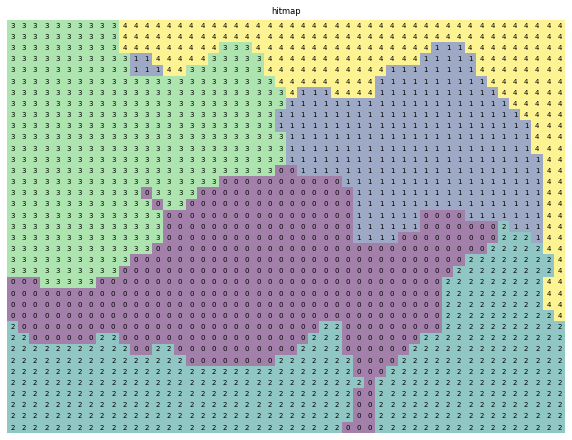

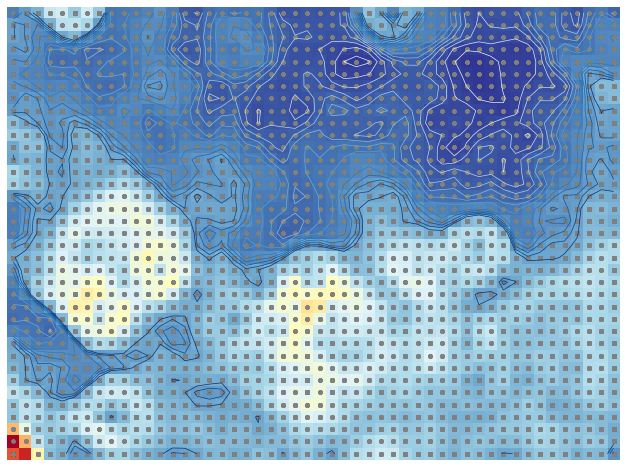

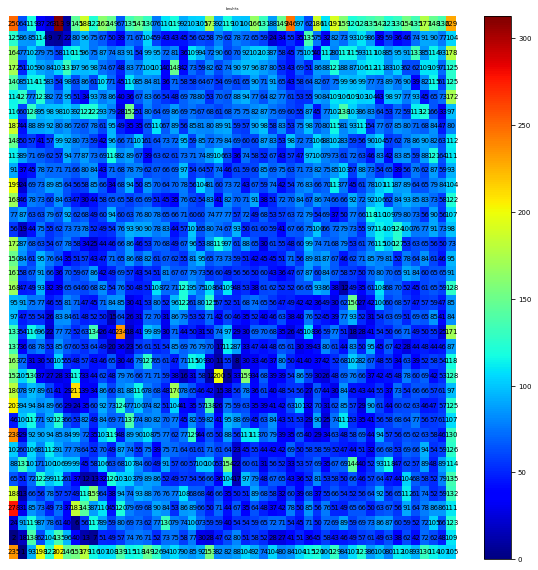

In [328]:
# plot hitmap, umatrix, and bmumap

"""
The ‘hills’ in the U-matrix represent large distances between neighbors and vice versa for valleys.

"""

som.cluster(5)

h = HitMapView(10, 10, 'hitmap')
u = UMatrixView(10, 10, "umatrix", text_size=7, labels=True, )
b = BmuHitsView(10, 10, "bmuhits", text_size=7)


x = h.show(som)
y = u.show(som)
z = b.show(som)



### Recommendation:

Try 4-6

# car_horn

In [329]:
# create an empty array for appending features
train = metadata[metadata['class'] == "car_horn"]['slice_file_name'].tolist()
# randomly select fraction of sample
train = random.sample(train, int(len(train) * 1/7))
X = np.array([])
    
for j in range(len(train)):
        
    loaded = fe.read(train[j])
    mfcc_features = fe.return_mfcc(loaded)

    if len(X) == 0:
                
        X = mfcc_features
            
    else:
                
        X = np.append(X, mfcc_features, axis=0)

# confirm shape is tractable for SOM: 100 - 200K

X.shape        

frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT 

frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT 

frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.
frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT 

(44199, 13)

In [330]:
# build som instance
som = sompy.SOMFactory().build(X, normalization = 'var', initialization='pca') 
# let sompy choose the mapsize
mapsize = som.calculate_map_size('rect')
# rebuild with map size
som = sompy.SOMFactory().build(X, mapsize = mapsize, normalization = 'var', initialization='pca') 
# train
som.train(n_job=-1, verbose='info', train_rough_len=10, train_finetune_len=10)
# check topographical error: ideally less than .20
som.calculate_topographic_error()

 Training...
 pca_linear_initialization took: 0.062000 seconds
 Rough training...
 radius_ini: 5.000000 , radius_final: 1.250000, trainlen: 10

 epoch: 1 ---> elapsed time:  0.421000, quantization error: 2.811109

 epoch: 2 ---> elapsed time:  0.359000, quantization error: 2.702857

 epoch: 3 ---> elapsed time:  0.381000, quantization error: 2.531057

 epoch: 4 ---> elapsed time:  0.368000, quantization error: 2.402142

 epoch: 5 ---> elapsed time:  0.356000, quantization error: 2.306689

 epoch: 6 ---> elapsed time:  0.375000, quantization error: 2.234470

 epoch: 7 ---> elapsed time:  0.360000, quantization error: 2.169924

 epoch: 8 ---> elapsed time:  0.368000, quantization error: 2.104717

 epoch: 9 ---> elapsed time:  0.366000, quantization error: 2.033999

 epoch: 10 ---> elapsed time:  0.356000, quantization error: 1.950634

 Finetune training...
 radius_ini: 1.250000 , radius_final: 1.000000, trainlen: 10

 epoch: 1 ---> elapsed time:  0.358000, quantization error: 1.852465

 

0.1546641326726849

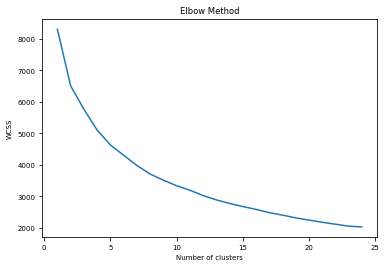

In [331]:
# create elbow plot applying kmeans cluster to the node weight vectors

codebook = som.codebook.matrix

wcss = []
for i in range(1, 25):
    kmeans = KMeans(n_clusters=i, init='k-means++', 
                    max_iter=300, n_init=10, random_state=0)
    kmeans.fit(codebook)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 25), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

/Users/chrisolen/anaconda3/lib/python3.7/site-packages/sompy/visualization/hitmap.py:37: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = self._fig.add_subplot(111)


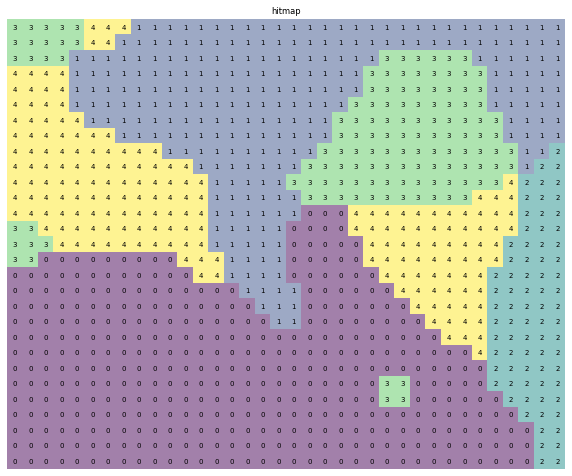

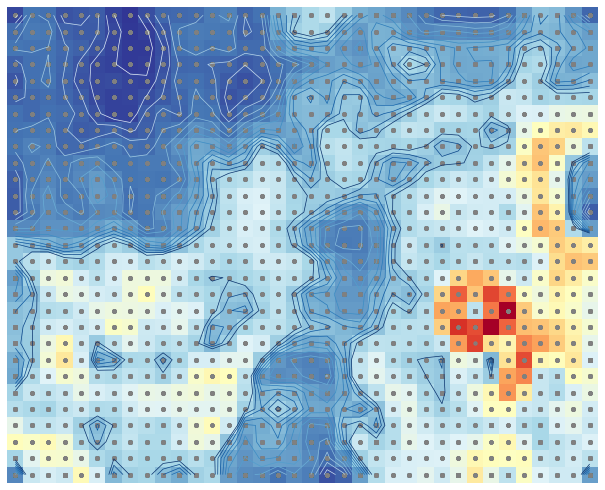

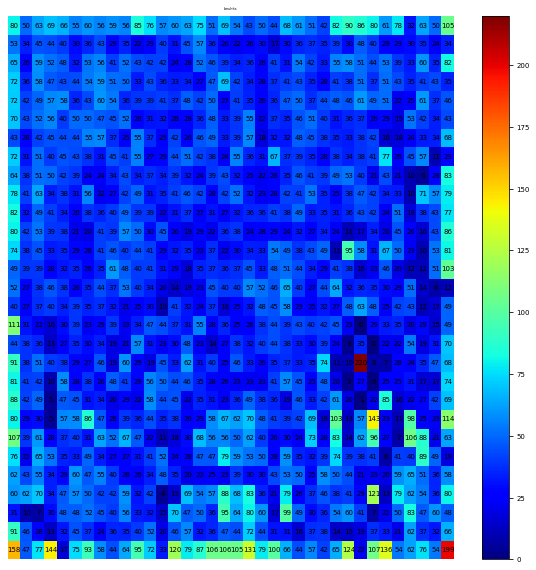

In [332]:
# plot hitmap, umatrix, and bmumap

"""
The ‘hills’ in the U-matrix represent large distances between neighbors and vice versa for valleys.

"""

som.cluster(5)

h = HitMapView(10, 10, 'hitmap')
u = UMatrixView(10, 10, "umatrix", text_size=7, labels=True, )
b = BmuHitsView(10, 10, "bmuhits", text_size=7)


x = h.show(som)
y = u.show(som)
z = b.show(som)



### Recommendation:

Try 10-12